In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import sys
import sklearn

In [3]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
print(x_train.shape)
print(y_train)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


(-0.5, 27.5, 27.5, -0.5)

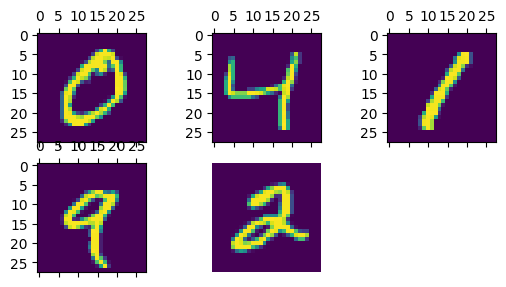

In [7]:
plt.subplot(3,3,1).matshow(x_train[1])
plt.subplot(3,3,2).matshow(x_train[2])
plt.subplot(3,3,3).matshow(x_train[3])
plt.subplot(3,3,4).matshow(x_train[4])
plt.subplot(3,3,5).matshow(x_train[5])
plt.axis('off')

In [132]:
#convert image to 1-d array - chuyển đổi ảnh thành mảng 1 chiều
X = x_train.reshape(len(x_train), -1)
Y = y_train
X_2 = X
X = X / 255.0
print(X.shape)
print(Y.shape)

(60000, 784)
(60000,)


In [95]:
from sklearn.cluster import KMeans

# chạy kmeans với k = 10

In [66]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [67]:
pred_label = kmeans.predict(X)
pred_label[:15]

array([8, 7, 2, 4, 5, 3, 1, 8, 1, 5, 9, 4, 9, 6, 1])

In [24]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

do k-means tự gắn label vào, nên label sau khi chạy xong không phản ánh đúng ảnh đó là số nào, mà nó đánh theo số clusters.
vì vậy ta phải gán lại nhãn cho đống trên, bằng cách đếm và gán theo số đông.

In [94]:
# mảng 2 chiều: đếm số label và gán lại cho đúng

def find_true_label(pred_label, y_train):
    rows, cols = (11, 11)
    count_label = [[0 for i in range(cols)] for j in range(rows)]

    for idx in range(0, pred_label.size):
        count_label[pred_label[idx]][y_train[idx]] += 1

    for idx in range(0, 10):
        print(idx,' ',count_label[idx])
        
    cluster_true_label = [0]*10

    for idx in range (0, 10):
        cluster_true_label[idx] = count_label[idx].index(max(count_label[idx]))

    print([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    print(cluster_true_label)

    true_pred_label = [0]*y_train.size
    for idx in range (0, y_train.size):
        true_pred_label[idx] = cluster_true_label[pred_label[idx]]

    print(y_train[:20])
    print(true_pred_label[:20])
    
    return true_pred_label

In [91]:
pred_Y = find_true_label(pred_label, y_train)


0   [2799, 0, 10, 15, 10, 62, 98, 15, 38, 37, 0]
1   [3, 3717, 365, 428, 159, 164, 271, 327, 297, 240, 0]
2   [38, 6, 174, 176, 3189, 375, 82, 1795, 193, 2901, 0]
3   [17, 9, 4197, 215, 38, 15, 87, 39, 56, 13, 0]
4   [21, 2978, 352, 104, 309, 800, 223, 283, 419, 117, 0]
5   [14, 9, 69, 48, 1940, 344, 1, 3773, 184, 2460, 0]
6   [181, 8, 212, 57, 164, 121, 4914, 4, 47, 7, 0]
7   [2504, 0, 95, 124, 11, 248, 122, 14, 32, 19, 0]
8   [185, 10, 156, 1043, 21, 1520, 92, 10, 3447, 70, 0]
9   [161, 5, 328, 3921, 1, 1772, 28, 5, 1138, 85, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 2, 1, 7, 6, 0, 8, 3]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[8, 0, 4, 1, 7, 2, 1, 8, 1, 7, 3, 1, 3, 6, 1, 7, 2, 8, 6, 7]


## tính accuracy của k means

In [92]:
from sklearn import metrics
    
print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, pred_Y)))

Accuracy: 0.59065



### áp dụng pca

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
print(X.shape)
pca.fit(X)

(60000, 784)


PCA(n_components=10)

In [114]:
X_pca = pca.transform(X)
print(X_pca.shape)

(60000, 10)


In [115]:
print(X_pca)

[[ 0.48601014 -1.22617344 -0.09613394 ...  0.62651813 -1.42544281
   0.77869181]
 [ 3.96752304 -1.15630215  2.3385866  ... -0.41173438  0.15853546
   0.59217367]
 [-0.20333179  1.53793392 -0.73925358 ...  1.44587098 -0.44893945
  -0.70036732]
 ...
 [-0.69824887  0.6277581  -1.01024906 ... -0.72507794 -0.34249283
   1.05293869]
 [ 0.51218066 -0.02192911  2.01513144 ...  0.55165033 -0.06466043
  -0.36720916]
 [-0.68014098 -0.0969367   2.18046643 ... -0.60597885  0.34178199
  -0.47414892]]


### chạy lại kmeans với pca

In [116]:
kmeans_pca = KMeans(n_clusters = 10)
kmeans_pca.fit(X_pca)
pca_pred_label = kmeans_pca.predict(X_pca)

In [119]:
pca_pred_Y = find_true_label(pca_pred_label, y_train)
print('Accuracy: {}'.format(metrics.accuracy_score(Y, pca_pred_Y)))

0   [8, 7, 58, 35, 1767, 251, 1, 3589, 220, 2285, 0]
1   [166, 7, 231, 36, 224, 73, 4593, 4, 55, 9, 0]
2   [17, 7, 4087, 199, 35, 12, 198, 41, 80, 16, 0]
3   [43, 4, 184, 181, 3191, 401, 91, 1812, 197, 2839, 0]
4   [3069, 0, 23, 15, 12, 74, 72, 18, 36, 47, 0]
5   [176, 3, 317, 3832, 0, 1639, 32, 4, 1023, 76, 0]
6   [129, 9, 145, 1007, 14, 1252, 54, 10, 3163, 77, 0]
7   [2272, 0, 130, 153, 15, 470, 150, 14, 48, 17, 0]
8   [19, 3071, 257, 107, 325, 815, 192, 243, 555, 135, 0]
9   [24, 3634, 526, 566, 259, 434, 535, 530, 474, 448, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[7, 6, 2, 4, 0, 3, 8, 0, 1, 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[8, 0, 4, 1, 7, 2, 1, 8, 1, 7, 3, 1, 3, 6, 1, 7, 2, 8, 1, 7]
Accuracy: 0.5750166666666666


##### giảm số chiều xuống 10, accuracy giảm


### thử với TSNE (trong này yêu cầu n_components phải nhỏ hơn 4)

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components = 2).fit_transform(X)

In [ ]:
print(X_tsne.shape)
kmeans_tsne = KMeans(n_clusters = 10)
kmeans_tsne.fit(X_tsne)
tsne_pred_label = kmeans_tsne.predict(X_tsne)
tsne_pred_Y = find_true_label(tsne_pred_label, y_train)
print('Accuracy: {}'.format(metrics.accuracy_score(Y, tsne_pred_Y)))

### thử với ISOMAP

In [ ]:
from sklearn.manifold import Isomap
X_isomap = Isomap(n_components = 2).fit_transform(X)
print(X_isomap.shape)

In [ ]:
print(X_isomap.shape)
kmeans_isomap = KMeans(n_clusters = 10)
kmeans_isomap.fit(X_isomap)
isomap_pred_label = kmeans_isomap.predict(X_isomap)
isomap_pred_Y = find_true_label(isomap_pred_label, y_train)
print('Accuracy: {}'.format(metrics.accuracy_score(Y, isomap_pred_Y)))

do thời gian chạy quá lâu nên em chưa thể chạy được isomap và tsne

###### thử phương pháp pixel centering

In [133]:
mean_of_X = X_2.mean()
print(mean_of_X)
X_center = X_2 - mean_of_X
print(X_center.mean())

33.318421449829934
9.893771063189535e-15


In [134]:
print(X_center.shape)
kmeans_center = KMeans(n_clusters = 10)
kmeans_center.fit(X_center)
center_pred_label = kmeans_center.predict(X_center)
center_pred_Y = find_true_label(center_pred_label, y_train)
print('Accuracy: {}'.format(metrics.accuracy_score(Y, center_pred_Y)))

(60000, 784)
0   [5, 10, 65, 35, 1889, 165, 1, 3766, 162, 2442, 0]
1   [1148, 6, 223, 465, 184, 1584, 1407, 11, 304, 28, 0]
2   [223, 5, 257, 3868, 0, 1811, 33, 5, 1010, 83, 0]
3   [2, 3046, 327, 50, 207, 228, 45, 257, 268, 86, 0]
4   [165, 6, 133, 33, 142, 72, 3985, 4, 45, 9, 0]
5   [78, 8, 178, 914, 11, 961, 23, 17, 3487, 72, 0]
6   [7, 9, 4152, 157, 33, 5, 65, 40, 43, 16, 0]
7   [44, 6, 193, 168, 3201, 372, 65, 1804, 178, 2913, 0]
8   [3, 3646, 387, 419, 168, 172, 240, 341, 325, 261, 0]
9   [4248, 0, 43, 22, 7, 51, 54, 20, 29, 39, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[7, 5, 3, 1, 6, 8, 2, 4, 1, 0]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[8, 0, 4, 1, 7, 2, 1, 8, 1, 7, 3, 1, 3, 6, 1, 7, 2, 8, 6, 7]
Accuracy: 0.58305


pixel centering cho accuracy bị giảm đi so với normalizing như ban đầu

##### thử phương pháp pixel standardization

In [140]:
std_of_X = X_2.std()
X_standard = (X_2 - mean_of_X) / std_of_X
type(X_standard)
X_standard = np.clip(X_standard, -1.0, 1.0)
X_standard = (X_standard + 1.0) / 2.0

In [141]:
print(X_standard.shape)
kmeans_standard = KMeans(n_clusters = 10)
kmeans_standard.fit(X_standard)
standard_pred_label = kmeans_standard.predict(X_standard)
standard_pred_Y = find_true_label(standard_pred_label, y_train)
print('Accuracy: {}'.format(metrics.accuracy_score(Y, standard_pred_Y)))

(60000, 784)
0   [11, 7, 48, 199, 1543, 281, 1, 2401, 239, 2481, 0]
1   [19, 5, 53, 30, 1585, 257, 1, 2921, 238, 1764, 0]
2   [66, 4, 212, 56, 2245, 151, 604, 480, 125, 1333, 0]
3   [613, 12, 144, 1228, 19, 1949, 133, 3, 3248, 46, 0]
4   [216, 11, 179, 66, 155, 146, 4627, 2, 44, 7, 0]
5   [21, 2941, 239, 64, 200, 672, 185, 195, 306, 76, 0]
6   [4788, 0, 70, 34, 4, 71, 85, 16, 36, 32, 0]
7   [0, 3742, 304, 333, 79, 85, 187, 206, 226, 117, 0]
8   [164, 7, 340, 3889, 0, 1794, 26, 6, 1355, 89, 0]
9   [25, 13, 4369, 232, 12, 15, 69, 35, 34, 4, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 7, 4, 8, 6, 1, 0, 1, 3, 2]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[8, 0, 4, 1, 9, 2, 1, 8, 1, 7, 8, 1, 3, 6, 1, 7, 2, 8, 6, 7]
Accuracy: 0.5875166666666667


Kết luận
\
khi chạy kmeans - pixel normalization
\
accuracy là: 0.59065
\
khi chạy kmeans - pixel centering
\
accuracy là: 0.58305
\
khi chạy kmeans - pixel standardization
\
accuracy là: 0.587516
\
khi chạy kmeans - pixel normalization -> pca = 10 chiều
\
accuracy: 0.575016